In [2]:
import pandas as pd
from sklearn import preprocessing
from sklearn_pandas import decomposition

In [23]:
df_teams_agg = pd.read_csv("./static/data/agg_teams.csv", index_col="team_name").iloc[:,:-3]
df_player_scoring = pd.read_csv("./static/data/agg_player_scoring_stats.csv")
df_data_post_3_point_line = pd.read_csv("./static/data/data_post_3_point_line.csv")

scaler = preprocessing.StandardScaler()
scaler.fit(df_teams_agg)


StandardScaler()

In [24]:
scaled_data = scaler.transform(df_teams_agg)

In [26]:
scaled_teams_agg = pd.DataFrame(scaled_data,index=df_teams_agg.index, columns=df_teams_agg.columns)

In [29]:
scaled_teams_agg.to_json("test.json")

In [30]:
scaled_teams_agg

,pts,fg3,fg2,fg,fg3a,fg2a,fg3p,fg2p,ft,fta,ftp,orb,drb,trb,ast,stl,blk,tov
team_name,,,,,,,,,,,,,,,,,,
Atlanta Hawks,0.419280,-0.447365,0.578184,0.345159,-0.308238,0.277344,-0.472395,0.428483,0.837124,0.353275,1.319842,1.531034,0.467093,0.927130,-0.491390,-0.159445,2.046054,0.912274
Boston Celtics,0.537324,-0.865326,1.175307,0.814075,-0.989337,0.346294,-0.121414,1.107805,0.226631,0.049657,1.333119,-0.056740,1.240800,1.027660,-0.613321,0.610709,2.432896,0.455962
Brooklyn Nets,0.013170,0.540940,-0.313843,-0.056429,0.385683,0.257364,-0.699240,-0.613379,-0.299656,-0.289916,-0.807821,-0.469278,0.180936,-0.013891,1.279645,0.598676,-1.249362,0.815556
Charlotte Hornets,-0.611743,-0.592043,-0.245901,-0.587799,-0.798074,-0.214468,0.416530,-0.114493,0.113277,0.488490,0.822152,0.967462,-0.084654,0.258515,-0.430425,-0.419690,-1.176643,-0.134649
Chicago Bulls,1.401187,0.760079,0.987975,1.511113,0.758544,0.402708,-0.389215,1.012172,-0.194398,0.145536,0.307525,2.506381,-1.480827,-0.418428,-1.137620,1.188326,-0.700529,-1.032011
Cleveland Cavaliers,-0.519702,-2.304970,0.554767,-0.643367,-1.350402,0.120639,-1.525341,0.334499,2.247573,1.296090,-1.131845,0.306180,2.688086,2.396418,-0.966918,2.508591,0.962894,1.368586
Dallas Mavericks,0.499764,0.876179,-0.065773,0.459220,0.011796,2.032437,0.604896,-0.283817,-0.383862,-0.541600,-0.286588,-0.056740,-0.106360,-0.116837,-0.296302,-1.342183,-0.197634,-1.091530
Denver Nuggets,1.079250,-0.286372,1.156574,1.068388,-0.669303,0.852764,0.952090,0.870592,0.869403,0.502421,1.402598,1.042605,0.289899,0.637397,0.730350,-0.038421,0.320736,-0.440790
Detroit Pistons,-0.203131,1.340581,-1.318562,-0.681387,1.111402,-1.095390,0.966021,-1.306098,0.247683,1.120311,-0.991338,-2.324989,-1.908641,-2.421299,0.508437,-1.177150,-1.242109,-0.218586


In [33]:
pca = decomposition.PCA(n_components=2)
pca.fit(scaled_teams_agg)

PCA(n_components=2)

In [36]:
pca_team_agg = pca.transform(scaled_teams_agg)

In [39]:
df = pd.DataFrame(pca_team_agg, index=df_teams_agg.index)
df.index.name = None
df

,0,1
Atlanta Hawks,-2.512192,1.248305
Boston Celtics,-2.866214,1.573661
Brooklyn Nets,0.863245,-0.424371
Charlotte Hornets,-0.108777,0.514804
Chicago Bulls,-1.757973,-1.940740
Cleveland Cavaliers,-2.443880,4.197597
Dallas Mavericks,-0.204637,-0.632057
Denver Nuggets,-3.133790,-0.665693
Detroit Pistons,3.651227,-2.996740
Golden State Warriors,-0.455252,-1.667650


<Axes: xlabel='0', ylabel='1'>

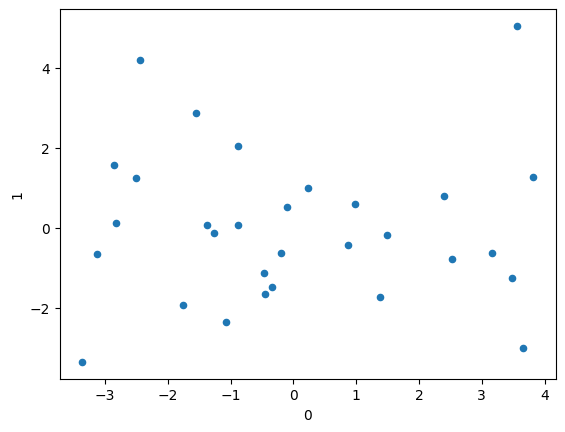

In [45]:
df.plot.scatter(x=0,y=1)

In [31]:
pd.read_json("test.json")

,pts,fg3,fg2,fg,fg3a,fg2a,fg3p,fg2p,ft,fta,ftp,orb,drb,trb,ast,stl,blk,tov
Atlanta Hawks,0.419280,-0.447365,0.578184,0.345159,-0.308238,0.277344,-0.472395,0.428483,0.837124,0.353275,1.319842,1.531034,0.467093,0.927130,-0.491390,-0.159445,2.046054,0.912274
Boston Celtics,0.537324,-0.865326,1.175307,0.814075,-0.989337,0.346294,-0.121414,1.107805,0.226631,0.049657,1.333119,-0.056740,1.240800,1.027660,-0.613321,0.610709,2.432896,0.455962
Brooklyn Nets,0.013170,0.540940,-0.313843,-0.056429,0.385683,0.257364,-0.699240,-0.613379,-0.299656,-0.289916,-0.807821,-0.469278,0.180936,-0.013891,1.279645,0.598676,-1.249362,0.815556
Charlotte Hornets,-0.611743,-0.592043,-0.245901,-0.587799,-0.798074,-0.214468,0.416530,-0.114493,0.113277,0.488490,0.822152,0.967462,-0.084654,0.258515,-0.430425,-0.419690,-1.176643,-0.134649
Chicago Bulls,1.401187,0.760079,0.987975,1.511113,0.758544,0.402708,-0.389215,1.012172,-0.194398,0.145536,0.307525,2.506381,-1.480827,-0.418428,-1.137620,1.188326,-0.700529,-1.032011
Cleveland Cavaliers,-0.519702,-2.304970,0.554767,-0.643367,-1.350402,0.120639,-1.525341,0.334499,2.247573,1.296090,-1.131845,0.306180,2.688086,2.396418,-0.966918,2.508591,0.962894,1.368586
Dallas Mavericks,0.499764,0.876179,-0.065773,0.459220,0.011796,2.032437,0.604896,-0.283817,-0.383862,-0.541600,-0.286588,-0.056740,-0.106360,-0.116837,-0.296302,-1.342183,-0.197634,-1.091530
Denver Nuggets,1.079250,-0.286372,1.156574,1.068388,-0.669303,0.852764,0.952090,0.870592,0.869403,0.502421,1.402598,1.042605,0.289899,0.637397,0.730350,-0.038421,0.320736,-0.440790
Detroit Pistons,-0.203131,1.340581,-1.318562,-0.681387,1.111402,-1.095390,0.966021,-1.306098,0.247683,1.120311,-0.991338,-2.324989,-1.908641,-2.421299,0.508437,-1.177150,-1.242109,-0.218586
Golden State Warriors,0.581074,-0.015114,0.473710,0.489441,0.232096,0.711778,0.673875,-0.946778,0.553739,-0.159311,-0.032892,-0.545286,-0.596491,-0.702173,2.152618,1.019061,-1.075469,2.044660
